Họ và tên: Phạm Đức Thể

MSSV: 19522253

Lớp: DS201.M11.2

Buổi 05 - 24/11/2021

# LAB 05 - ỨNG DỤNG MẠNG NEURAL TÍCH CHẬP

## Set up

In [ ]:
# Check GPU
!nvidia-smi

Thu Nov 25 07:11:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Import các thư viện cần thiết

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sn

from tensorflow.keras.utils import to_categorical
from keras.models import Model, Input
from tensorflow.keras.optimizers import Adam
from keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from keras.regularizers import l2
from keras.preprocessing.image import image_dataset_from_directory
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet import ResNet50
from keras.layers import Flatten, Dense, Dropout
from keras.utils.vis_utils import plot_model


sn.set() # Set theme

## **Bài 1**:
Thực hiện huấn luyện mô hình mạng neural dùng cho phân lớp nhị phân cho bộ dữ liệu Chest X-ray bằng kỹ thuật transfer learning. Tinh chỉnh lại các mô hình sau: `VGG-16`, `VGG-19`, `ResNet-50`. Đánh giá mô hình bằng các độ đo: `accuracy`, `precision`, `recall` và `F1-score`. Có kết luận gì về khả năng phân lớp của các mô hình?

### Chuẩn bị dữ liệu

In [ ]:
IMG_SIZE = 227
IMG_CHANNEL = 3
BATCH_SIZE = 256
COLOR_MODE = 'rgb'

# Load train set
train_set_bai1 = image_dataset_from_directory('/content/drive/MyDrive/Dataset/chest_xray/chest_xray/train',
                                              labels = 'inferred',
                                              label_mode = 'binary',
                                              class_names = ['NORMAL', 'PNEUMONIA'],
                                              color_mode = COLOR_MODE,
                                              batch_size = BATCH_SIZE,
                                              image_size = (IMG_SIZE, IMG_SIZE),
                                              interpolation = 'bilinear')
# Load dev set
dev_set_bai1 = image_dataset_from_directory('/content/drive/MyDrive/Dataset/chest_xray/chest_xray/val',
                                            labels = 'inferred',
                                            label_mode = 'binary',
                                            class_names = ['NORMAL', 'PNEUMONIA'],
                                            color_mode = COLOR_MODE,
                                            batch_size = BATCH_SIZE,
                                            image_size = (IMG_SIZE, IMG_SIZE),
                                            interpolation = 'bilinear')
# Load test set
test_set_bai1 = image_dataset_from_directory('/content/drive/MyDrive/Dataset/chest_xray/chest_xray/test',
                                            labels = 'inferred',
                                            label_mode = 'binary',
                                            class_names = ['NORMAL', 'PNEUMONIA'],
                                            color_mode = COLOR_MODE,
                                            batch_size = BATCH_SIZE,
                                            image_size = (IMG_SIZE, IMG_SIZE),
                                            interpolation = 'bilinear')

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


### **VGG-16 pre-trained**

#### Xây dựng mô hình

In [ ]:
vgg = VGG16(include_top=False, input_shape = (IMG_SIZE, IMG_SIZE, IMG_CHANNEL))
#Chúng ta sẽ "đóng băng" (freeze) các lớp trước đó. Việc này sẽ giúp cho các trọng số của mô hình VGG-16 trước đó được bảo toàn.
for layer in vgg.layers:
  layer.trainable = False

flat = Flatten()(vgg.layers[-1].output)
fc1 = Dense(1024, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(fc1)

model_1 = Model(inputs=vgg.inputs, outputs=output)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

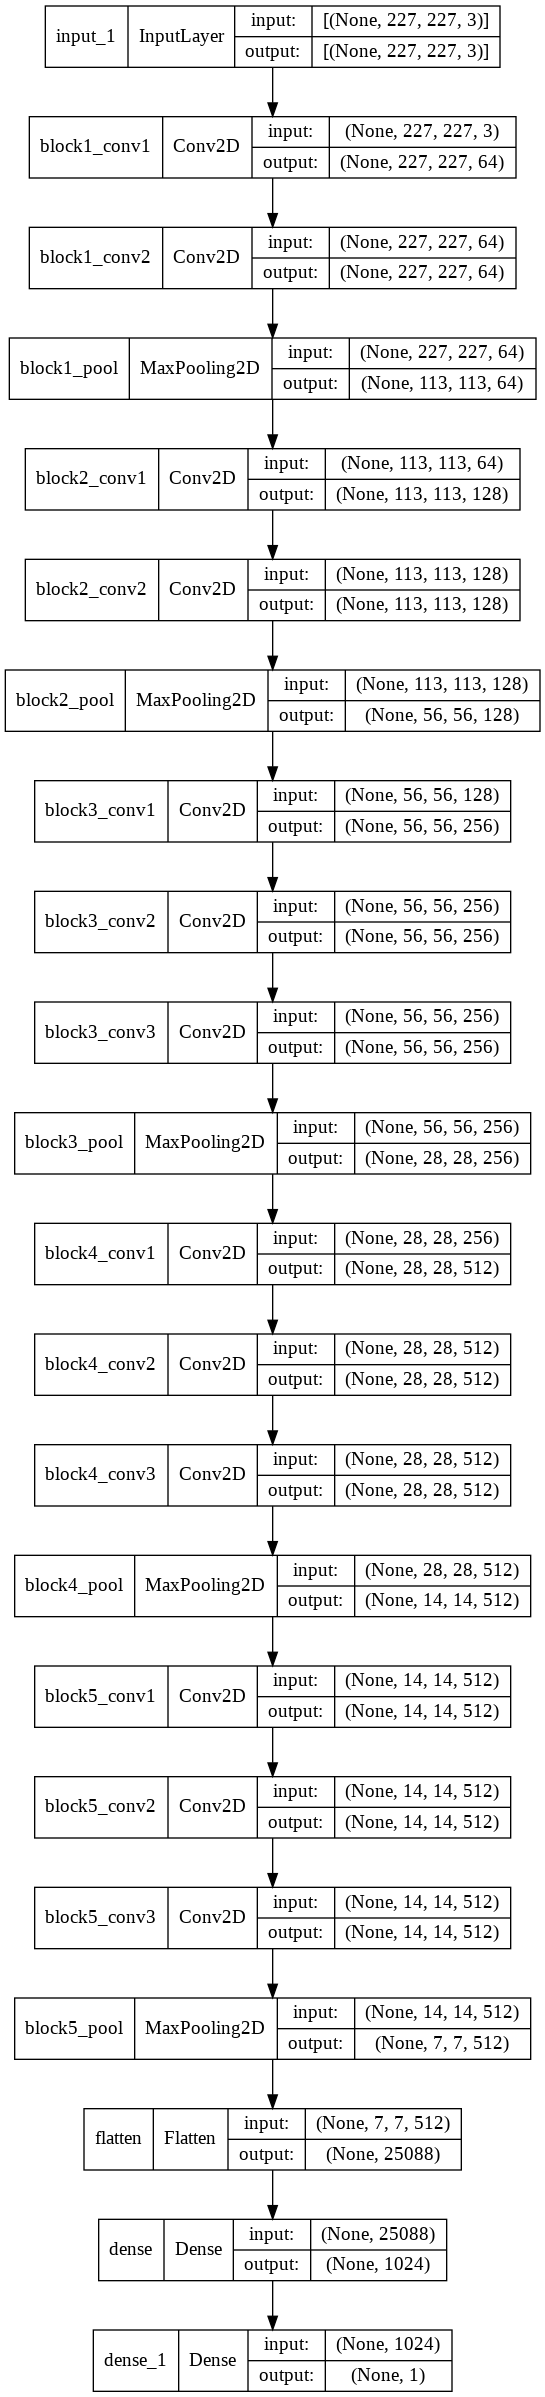

In [ ]:
plot_model(model_1, to_file='Bai1_Model_VGG16.png', show_shapes=True, show_layer_names=True)

#### Huấn luyện mô hình

In [ ]:
# Compile model
Optimizer = Adam(learning_rate=1e-3)
Loss = BinaryCrossentropy()
model_1.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [ ]:
# Training model
history_1 = model_1.fit(train_set_bai1, 
                        validation_data=dev_set_bai1, epochs=10)

Epoch 1/10
21/21 [==============================] - 685s 18s/step - loss: 40.9207 - accuracy: 0.7462 - val_loss: 0.4613 - val_accuracy: 0.9375
Epoch 2/10
21/21 [==============================] - 63s 2s/step - loss: 0.6188 - accuracy: 0.9385 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 3/10
21/21 [==============================] - 63s 2s/step - loss: 0.2234 - accuracy: 0.9668 - val_loss: 0.2650 - val_accuracy: 0.9375
Epoch 4/10
21/21 [==============================] - 63s 2s/step - loss: 0.0873 - accuracy: 0.9818 - val_loss: 0.1778 - val_accuracy: 0.9375
Epoch 5/10
21/21 [==============================] - 63s 2s/step - loss: 0.0464 - accuracy: 0.9885 - val_loss: 0.0338 - val_accuracy: 1.0000
Epoch 6/10
21/21 [==============================] - 63s 2s/step - loss: 0.0287 - accuracy: 0.9914 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 7/10
21/21 [==============================] - 63s 2s/step - loss: 0.0147 - accuracy: 0.9958 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 8/10
21/21 

#### Visualization Loss & Accuracy

##### Accuracy

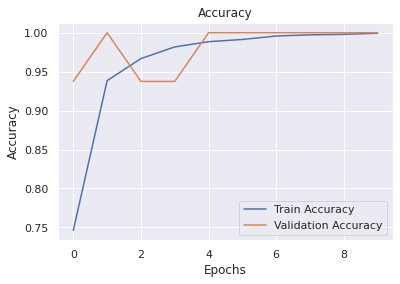

In [ ]:
plt.plot(history_1.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Loss

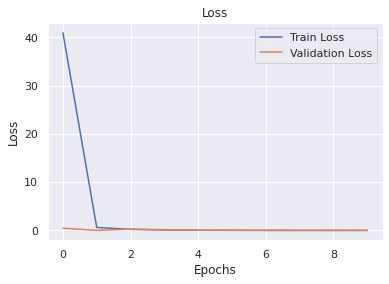

In [ ]:
plt.plot(history_1.history['loss'], label = 'Train Loss')
plt.plot(history_1.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Đánh giá model

In [ ]:
y_pred_total = []
y_true = []

for img, label in test_set_bai1:
  y_pred = model_1.predict(img)
  y_pred_total += [1 if i > 0.5 else 0 for i in y_pred]
  y_true += np.array(label).flatten().tolist()

In [ ]:
accuracy = round(accuracy_score(y_true, y_pred_total)*100,2)
print('Accuracy test = {}%'.format(accuracy))
  
precision = round(precision_score(y_true, y_pred_total)*100,2)
print('Precision test = {}%'.format(precision))

recall = round(recall_score(y_true, y_pred_total)*100,2)
print('Recall test = {}%'.format(recall))

f1 = round(f1_score(y_true, y_pred_total)*100,2)
print('F1-score test = {}%'.format(f1))

Accuracy test = 78.53%
Precision test = 74.43%
Recall test = 100.0%
F1-score test = 85.34%


#### Save model

In [ ]:
model_1.save('/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/NĂM 3 2021-2022/HỌC KỲ 1 2021 - 2022/DS201.M11 - DEEP LEARNING TRONG KHOA HỌC DỮ LIỆU/THỰC HÀNH/LAB/LAB05 24 11 2021/VGG16_for_chest_xray.h5')

### **VGG-19 pre-trained**

#### Xây dựng mô hình

In [ ]:
vgg = VGG19(include_top=False, input_shape = (IMG_SIZE, IMG_SIZE, IMG_CHANNEL))
#Chúng ta sẽ "đóng băng" (freeze) các lớp trước đó. Việc này sẽ giúp cho các trọng số của mô hình VGG-16 trước đó được bảo toàn.
for layer in vgg.layers:
  layer.trainable = False

flat = Flatten()(vgg.layers[-1].output)
fc1 = Dense(1024, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(fc1)

model_2 = Model(inputs=vgg.inputs, outputs=output)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

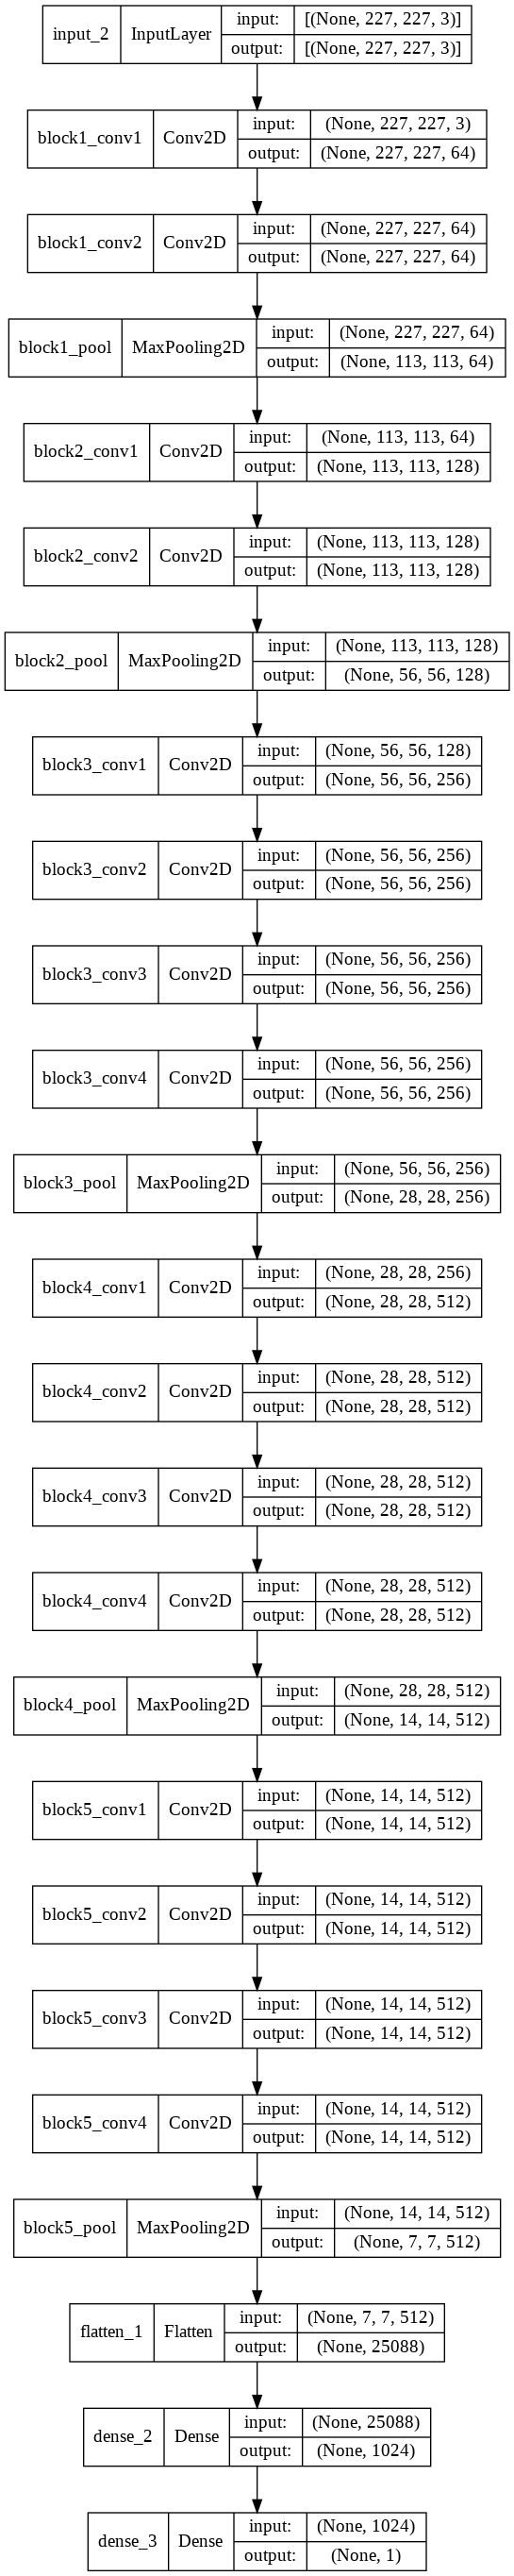

In [ ]:
plot_model(model_2, to_file='Bai1_Model_VGG19.png', show_shapes=True, show_layer_names=True)

#### Huấn luyện mô hình

In [ ]:
# Compile model
Optimizer = Adam(learning_rate=1e-3)
Loss = BinaryCrossentropy()
model_2.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [ ]:
# Training model
history_2 = model_2.fit(train_set_bai1, 
                        validation_data=dev_set_bai1, epochs=10)

Epoch 1/10
21/21 [==============================] - 73s 3s/step - loss: 8.8578 - accuracy: 0.9212 - val_loss: 8.7030e-20 - val_accuracy: 1.0000
Epoch 2/10
21/21 [==============================] - 70s 3s/step - loss: 1.2767 - accuracy: 0.9801 - val_loss: 2.3934 - val_accuracy: 0.8750
Epoch 3/10
21/21 [==============================] - 70s 3s/step - loss: 0.3699 - accuracy: 0.9914 - val_loss: 0.1047 - val_accuracy: 0.9375
Epoch 4/10
21/21 [==============================] - 70s 3s/step - loss: 0.0567 - accuracy: 0.9971 - val_loss: 4.8239e-12 - val_accuracy: 1.0000
Epoch 5/10
21/21 [==============================] - 70s 3s/step - loss: 0.0554 - accuracy: 0.9975 - val_loss: 0.5121 - val_accuracy: 0.9375
Epoch 6/10
21/21 [==============================] - 70s 3s/step - loss: 0.0154 - accuracy: 0.9988 - val_loss: 3.2890e-06 - val_accuracy: 1.0000
Epoch 7/10
21/21 [==============================] - 70s 3s/step - loss: 0.0186 - accuracy: 0.9987 - val_loss: 5.4302e-05 - val_accuracy: 1.0000
Epoc

#### Visualization Loss & Accuracy

##### Accuracy

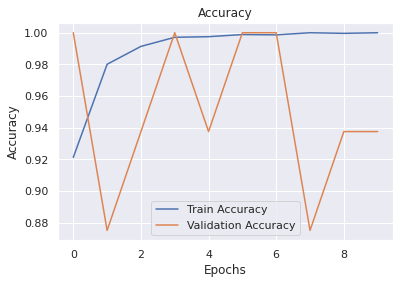

In [ ]:
plt.plot(history_2.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Loss

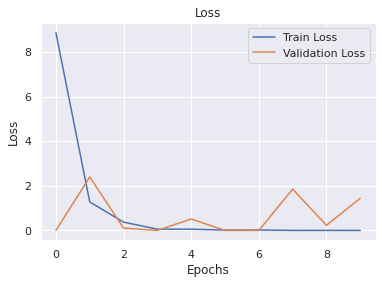

In [ ]:
plt.plot(history_2.history['loss'], label = 'Train Loss')
plt.plot(history_2.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Đánh giá model

In [ ]:
y_pred_total = []
y_true = []

for img, label in test_set_bai1:
  y_pred = model_2.predict(img)
  y_pred_total += [1 if i > 0.5 else 0 for i in y_pred]
  y_true += np.array(label).flatten().tolist()

In [ ]:
accuracy = round(accuracy_score(y_true, y_pred_total)*100,2)
print('Accuracy test = {}%'.format(accuracy))

precision = round(precision_score(y_true, y_pred_total)*100,2)
print('Precision test = {}%'.format(precision))

recall = round(recall_score(y_true, y_pred_total)*100,2)
print('Recall test = {}%'.format(recall))

f1 = round(f1_score(y_true, y_pred_total)*100,2)
print('F1-score test = {}%'.format(f1))

Accuracy test = 78.53%
Precision test = 74.52%
Recall test = 99.74%
F1-score test = 85.31%


#### Save model

In [ ]:
model_2.save('/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/NĂM 3 2021-2022/HỌC KỲ 1 2021 - 2022/DS201.M11 - DEEP LEARNING TRONG KHOA HỌC DỮ LIỆU/THỰC HÀNH/LAB/LAB05 24 11 2021/VGG19_for_chest_xray.h5')

### **ResNet-50 pre-trained**

#### Xây dựng mô hình

In [ ]:
resnet = ResNet50(include_top=False, input_shape = (IMG_SIZE, IMG_SIZE, IMG_CHANNEL))
#Chúng ta sẽ "đóng băng" (freeze) các lớp trước đó. Việc này sẽ giúp cho các trọng số của mô hình VGG-16 trước đó được bảo toàn.
for layer in resnet.layers:
  layer.trainable = False

flat = Flatten()(resnet.layers[-1].output)
fc1 = Dense(1024, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(fc1)

model_3 = Model(inputs=resnet.inputs, outputs=output)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
model_3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 233, 233, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 114, 114, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
plot_model(model_3, to_file='Bai1_Model_ResNet50.png', show_shapes=True, show_layer_names=True)

Output hidden; open in https://colab.research.google.com to view.

#### Huấn luyện mô hình

In [ ]:
# Compile model
Optimizer = Adam(learning_rate=1e-3)
Loss = BinaryCrossentropy()
model_3.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [ ]:
# Training model
history_3 = model_3.fit(train_set_bai1, 
                        validation_data=dev_set_bai1, epochs=10)

Epoch 1/10
21/21 [==============================] - 76s 2s/step - loss: 25.3464 - accuracy: 0.8194 - val_loss: 7.8439 - val_accuracy: 0.7500
Epoch 2/10
21/21 [==============================] - 60s 2s/step - loss: 0.3414 - accuracy: 0.9429 - val_loss: 0.8880 - val_accuracy: 0.7500
Epoch 3/10
21/21 [==============================] - 60s 2s/step - loss: 0.0553 - accuracy: 0.9804 - val_loss: 0.1830 - val_accuracy: 0.9375
Epoch 4/10
21/21 [==============================] - 60s 2s/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.1184 - val_accuracy: 1.0000
Epoch 5/10
21/21 [==============================] - 60s 2s/step - loss: 0.0212 - accuracy: 0.9935 - val_loss: 0.0769 - val_accuracy: 1.0000
Epoch 6/10
21/21 [==============================] - 60s 2s/step - loss: 0.0164 - accuracy: 0.9965 - val_loss: 0.0627 - val_accuracy: 1.0000
Epoch 7/10
21/21 [==============================] - 60s 2s/step - loss: 0.0133 - accuracy: 0.9975 - val_loss: 0.0630 - val_accuracy: 1.0000
Epoch 8/10
21/21 [=

#### Visualization Loss & Accuracy

##### Accuracy

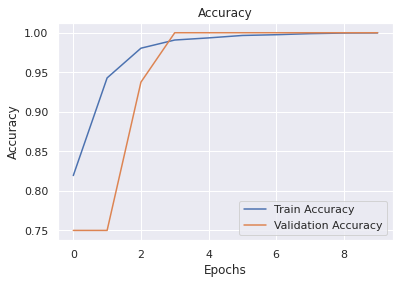

In [ ]:
plt.plot(history_3.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Loss

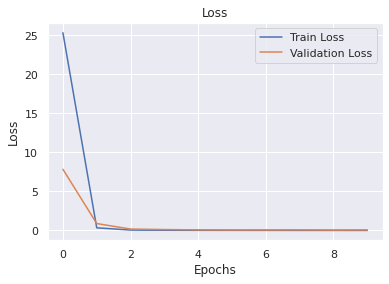

In [ ]:
plt.plot(history_3.history['loss'], label = 'Train Loss')
plt.plot(history_3.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Đánh giá model

In [ ]:
y_pred_total = []
y_true = []

for img, label in test_set_bai1:
  y_pred = model_3.predict(img)
  y_pred_total += [1 if i > 0.5 else 0 for i in y_pred]
  y_true += np.array(label).flatten().tolist()

In [ ]:
accuracy = round(accuracy_score(y_true, y_pred_total)*100,2)
print('Accuracy test = {}%'.format(accuracy))

precision = round(precision_score(y_true, y_pred_total)*100,2)
print('Precision test = {}%'.format(precision))

recall = round(recall_score(y_true, y_pred_total)*100,2)
print('Recall test = {}%'.format(recall))

f1 = round(f1_score(y_true, y_pred_total)*100,2)
print('F1-score test = {}%'.format(f1))

Accuracy test = 78.04%
Precision test = 74.1%
Recall test = 99.74%
F1-score test = 85.03%


#### Save model

In [ ]:
model_3.save('/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/NĂM 3 2021-2022/HỌC KỲ 1 2021 - 2022/DS201.M11 - DEEP LEARNING TRONG KHOA HỌC DỮ LIỆU/THỰC HÀNH/LAB/LAB05 24 11 2021/ResNet50_for_chest_xray.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


## **Bài 2**:
Thực hiện các yêu cầu của Bài 1 với bộ dữ liệu Jewellery.

Gợi ý:
+ Dùng hàm loss là: categorical_crossentropy.
+ Dùng lớp Dense cuối với unit là 5.
+ Tạo thêm tập validation từ tập train bằng cách lấy 10% dữ liệu từ tập train.

### Chuẩn bị dữ liệu

In [ ]:
!git clone https://github.com/princesegzy01/Jewellery-Classification.git

Cloning into 'Jewellery-Classification'...
remote: Enumerating objects: 1831, done.
remote: Total 1831 (delta 0), reused 0 (delta 0), pack-reused 1831
Receiving objects: 100% (1831/1831), 49.51 MiB | 24.14 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
IMG_SIZE = 227
IMG_CHANNEL = 3
BATCH_SIZE = 256
COLOR_MODE = 'rgb'

# Load train set
train_set_bai2 = image_dataset_from_directory('/content/Jewellery-Classification/dataset/training',
                                              labels = 'inferred',
                                              label_mode = 'categorical',
                                              class_names = ['BRACELET',
                                                             'EARRINGS',
                                                             'NECKLACE',
                                                             'RINGS', 
                                                             'WRISTWATCH'],
                                              color_mode = COLOR_MODE,
                                              batch_size = BATCH_SIZE,
                                              image_size = (IMG_SIZE, IMG_SIZE),
                                              interpolation = 'bilinear')
# Load dev set
dev_set_bai2 = image_dataset_from_directory('/content/Jewellery-Classification/dataset/training',
                                            labels = 'inferred',
                                            label_mode = 'categorical',
                                            class_names = ['BRACELET',
                                                           'EARRINGS',
                                                           'NECKLACE',
                                                           'RINGS', 
                                                           'WRISTWATCH'],
                                            color_mode = COLOR_MODE,
                                            batch_size = BATCH_SIZE,
                                            image_size = (IMG_SIZE, IMG_SIZE),
                                            interpolation = 'bilinear',
                                            subset="validation",
                                            seed=1, validation_split=0.1)
# Load test set
test_set_bai2 = image_dataset_from_directory('/content/Jewellery-Classification/dataset/test',
                                             labels = 'inferred',
                                             label_mode = 'categorical',
                                             class_names = ['BRACELET',
                                                            'EARRINGS',
                                                            'NECKLACE',
                                                            'RINGS', 
                                                            'WRISTWATCH'],
                                             color_mode = COLOR_MODE,
                                             batch_size = BATCH_SIZE,
                                             image_size = (IMG_SIZE, IMG_SIZE),
                                             interpolation = 'bilinear')

Found 1566 files belonging to 5 classes.
Found 1566 files belonging to 5 classes.
Using 156 files for validation.
Found 250 files belonging to 5 classes.


### **VGG-16 pre-trained**

#### Xây dựng mô hình

In [ ]:
vgg = VGG16(include_top=False, input_shape = (IMG_SIZE, IMG_SIZE, IMG_CHANNEL))
#Chúng ta sẽ "đóng băng" (freeze) các lớp trước đó. Việc này sẽ giúp cho các trọng số của mô hình VGG-16 trước đó được bảo toàn.
for layer in vgg.layers:
  layer.trainable = False

flat = Flatten()(vgg.layers[-1].output)
fc1 = Dense(1024, activation='relu')(flat)
output = Dense(5, activation='softmax')(fc1)

model_4 = Model(inputs=vgg.inputs, outputs=output)

In [ ]:
model_4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

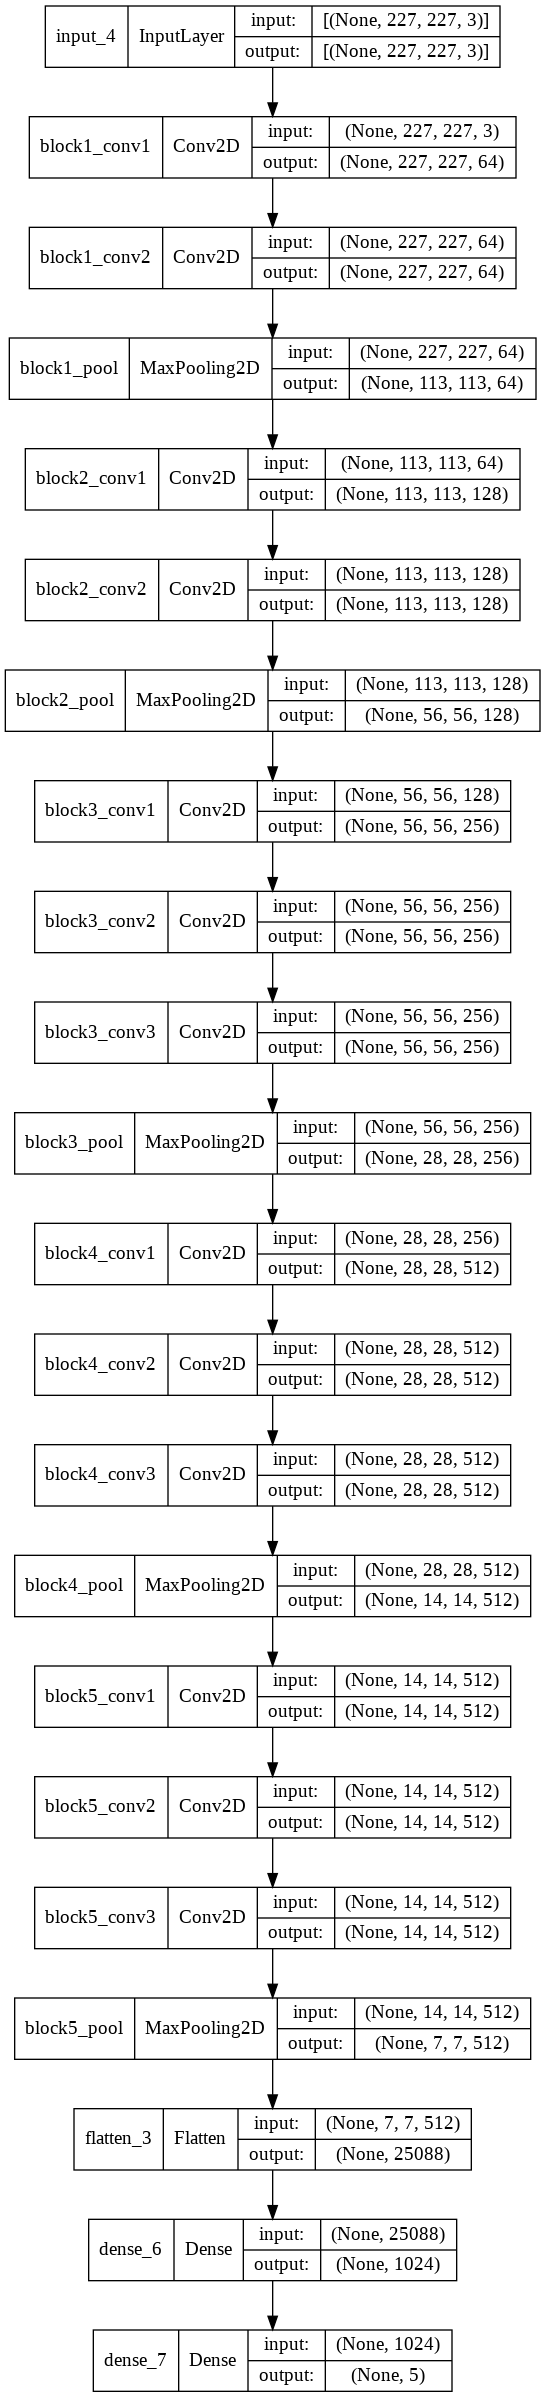

In [ ]:
plot_model(model_4, to_file='Bai2_Model_VGG16.png', show_shapes=True, show_layer_names=True)

#### Huấn luyện mô hình

In [ ]:
# Compile model
Optimizer = Adam(learning_rate=1e-3)
Loss = CategoricalCrossentropy()
model_4.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [ ]:
# Training model
history_4 = model_4.fit(train_set_bai2, 
                        validation_data=dev_set_bai2, epochs=10)

Epoch 1/10
7/7 [==============================] - 59s 8s/step - loss: 60.0323 - accuracy: 0.6750 - val_loss: 7.2082 - val_accuracy: 0.9423
Epoch 2/10
7/7 [==============================] - 16s 2s/step - loss: 5.4409 - accuracy: 0.9330 - val_loss: 2.3807 - val_accuracy: 0.9679
Epoch 3/10
7/7 [==============================] - 16s 2s/step - loss: 1.0815 - accuracy: 0.9681 - val_loss: 0.0087 - val_accuracy: 0.9936
Epoch 4/10
7/7 [==============================] - 16s 2s/step - loss: 0.3437 - accuracy: 0.9904 - val_loss: 0.0386 - val_accuracy: 0.9936
Epoch 5/10
7/7 [==============================] - 16s 2s/step - loss: 0.0536 - accuracy: 0.9962 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 16s 2s/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 1.9598e-06 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 16s 2s/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 3.8208e-09 - val_accuracy: 1.0000
Epoch 8/10
7/7 [=========

#### Visualization Loss & Accuracy

##### Accuracy

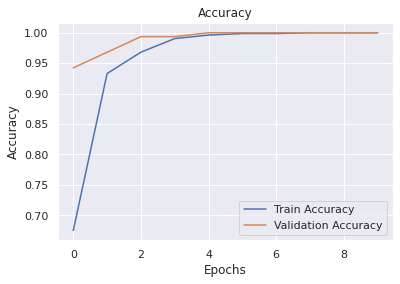

In [ ]:
plt.plot(history_4.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_4.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Loss

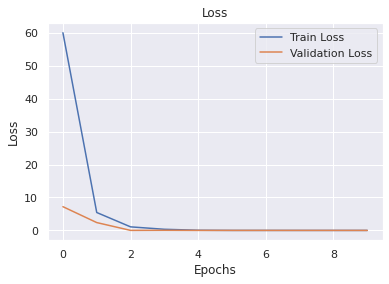

In [ ]:
plt.plot(history_4.history['loss'], label = 'Train Loss')
plt.plot(history_4.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Đánh giá model

In [ ]:
y_pred_total = []
y_true = []

for img, label in test_set_bai2:
  y_pred = model_4.predict(img)
  y_pred_total += np.argmax(y_pred, axis=-1).tolist()
  y_true += np.array(np.argmax(label, axis=-1)).flatten().tolist()

In [ ]:
accuracy = round(accuracy_score(y_true, y_pred_total)*100,2)
print('Accuracy test = {}%'.format(accuracy))

precision = round(precision_score(y_true, y_pred_total, average='micro')*100,2)
print('Precision micro test = {}%'.format(precision))
precision = round(precision_score(y_true, y_pred_total, average='macro')*100,2)
print('Precision macro test = {}%'.format(precision))

recall = round(recall_score(y_true, y_pred_total, average='micro')*100,2)
print('Recall micro test = {}%'.format(recall))
recall = round(recall_score(y_true, y_pred_total, average='macro')*100,2)
print('Recall macro test = {}%'.format(recall))

f1 = round(f1_score(y_true, y_pred_total, average='micro')*100,2)
print('F1-score micro test = {}%'.format(f1))
f1 = round(f1_score(y_true, y_pred_total, average='macro')*100,2)
print('F1-score macro test = {}%'.format(f1))

Accuracy test = 90.4%
Precision micro test = 90.4%
Precision macro test = 92.2%
Recall micro test = 90.4%
Recall macro test = 90.4%
F1-score micro test = 90.4%
F1-score macro test = 89.99%


#### Save model

In [ ]:
model_4.save('/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/NĂM 3 2021-2022/HỌC KỲ 1 2021 - 2022/DS201.M11 - DEEP LEARNING TRONG KHOA HỌC DỮ LIỆU/THỰC HÀNH/LAB/LAB05 24 11 2021/VGG16_for_Jewellery.h5')

### **VGG-19 pre-trained**

#### Xây dựng mô hình

In [ ]:
vgg = VGG19(include_top=False, input_shape = (IMG_SIZE, IMG_SIZE, IMG_CHANNEL))
#Chúng ta sẽ "đóng băng" (freeze) các lớp trước đó. Việc này sẽ giúp cho các trọng số của mô hình VGG-16 trước đó được bảo toàn.
for layer in vgg.layers:
  layer.trainable = False

flat = Flatten()(vgg.layers[-1].output)
fc1 = Dense(1024, activation='relu')(flat)
output = Dense(5, activation='softmax')(fc1)

model_5 = Model(inputs=vgg.inputs, outputs=output)

In [ ]:
model_5.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

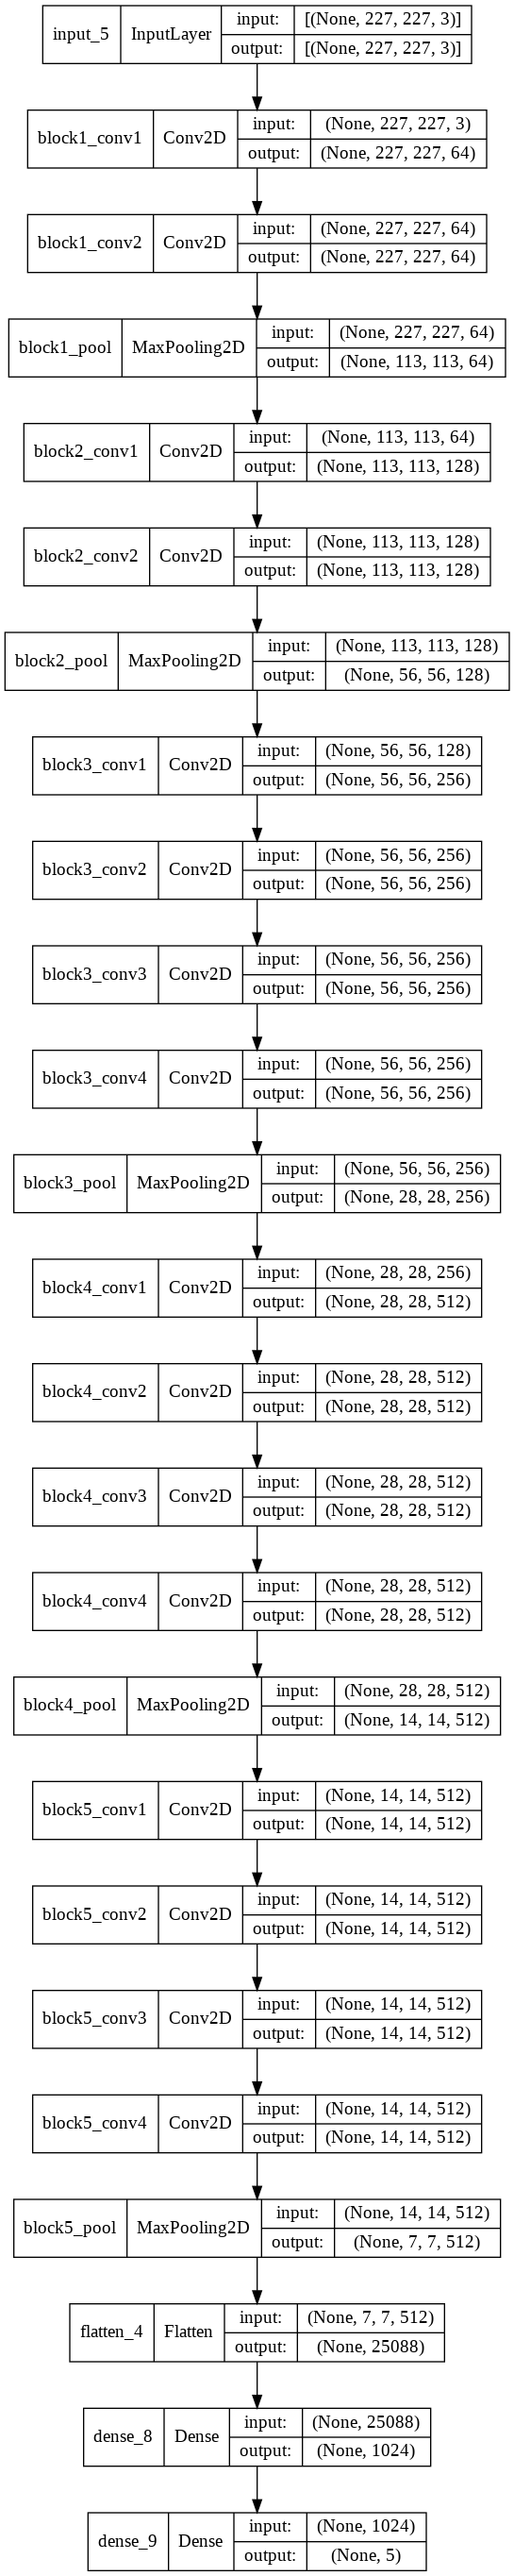

In [ ]:
plot_model(model_5, to_file='Bai2_Model_VGG19.png', show_shapes=True, show_layer_names=True)

#### Huấn luyện mô hình

In [ ]:
# Compile model
Optimizer = Adam(learning_rate=1e-3)
Loss = CategoricalCrossentropy()
model_5.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [ ]:
# Training model
history_5 = model_5.fit(train_set_bai2, 
                        validation_data=dev_set_bai2, epochs=10)

Epoch 1/10
7/7 [==============================] - 20s 2s/step - loss: 46.1514 - accuracy: 0.6488 - val_loss: 6.5658 - val_accuracy: 0.9551
Epoch 2/10
7/7 [==============================] - 19s 2s/step - loss: 3.4059 - accuracy: 0.9706 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 19s 2s/step - loss: 1.5400 - accuracy: 0.9783 - val_loss: 0.3839 - val_accuracy: 0.9936
Epoch 4/10
7/7 [==============================] - 19s 2s/step - loss: 0.1397 - accuracy: 0.9962 - val_loss: 2.2417e-06 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 19s 2s/step - loss: 0.0839 - accuracy: 0.9974 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 19s 2s/step - loss: 3.0449e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 19s 2s/step - loss: 0.0761 - accuracy: 0.9962 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 8/10
7/

#### Visualization Loss & Accuracy

##### Accuracy

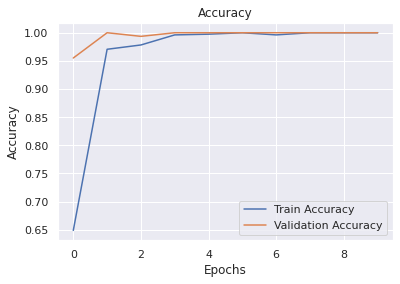

In [ ]:
plt.plot(history_5.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_5.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Loss

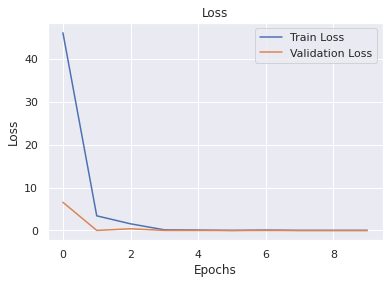

In [ ]:
plt.plot(history_5.history['loss'], label = 'Train Loss')
plt.plot(history_5.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Đánh giá model

In [ ]:
y_pred_total = []
y_true = []

for img, label in test_set_bai2:
  y_pred = model_5.predict(img)
  y_pred_total += np.argmax(y_pred, axis=-1).tolist()
  y_true += np.array(np.argmax(label, axis=-1)).flatten().tolist()

In [ ]:
accuracy = round(accuracy_score(y_true, y_pred_total)*100,2)
print('Accuracy test = {}%'.format(accuracy))

precision = round(precision_score(y_true, y_pred_total, average='micro')*100,2)
print('Precision micro test = {}%'.format(precision))
precision = round(precision_score(y_true, y_pred_total, average='macro')*100,2)
print('Precision macro test = {}%'.format(precision))

recall = round(recall_score(y_true, y_pred_total, average='micro')*100,2)
print('Recall micro test = {}%'.format(recall))
recall = round(recall_score(y_true, y_pred_total, average='macro')*100,2)
print('Recall macro test = {}%'.format(recall))

f1 = round(f1_score(y_true, y_pred_total, average='micro')*100,2)
print('F1-score micro test = {}%'.format(f1))
f1 = round(f1_score(y_true, y_pred_total, average='macro')*100,2)
print('F1-score macro test = {}%'.format(f1))

Accuracy test = 91.6%
Precision micro test = 91.6%
Precision macro test = 93.44%
Recall micro test = 91.6%
Recall macro test = 91.6%
F1-score micro test = 91.6%
F1-score macro test = 91.59%


#### Save model

In [ ]:
model_5.save('/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/NĂM 3 2021-2022/HỌC KỲ 1 2021 - 2022/DS201.M11 - DEEP LEARNING TRONG KHOA HỌC DỮ LIỆU/THỰC HÀNH/LAB/LAB05 24 11 2021/VGG19_for_Jewellery.h5')

### **ResNet-50 pre-trained**

#### Xây dựng mô hình

In [ ]:
resnet = ResNet50(include_top=False, input_shape = (IMG_SIZE, IMG_SIZE, IMG_CHANNEL))
#Chúng ta sẽ "đóng băng" (freeze) các lớp trước đó. Việc này sẽ giúp cho các trọng số của mô hình VGG-16 trước đó được bảo toàn.
for layer in resnet.layers:
  layer.trainable = False

flat = Flatten()(resnet.layers[-1].output)
fc1 = Dense(1024, activation='relu')(flat)
output = Dense(5, activation='softmax')(fc1)

model_6 = Model(inputs=resnet.inputs, outputs=output)

In [ ]:
model_6.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 233, 233, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 114, 114, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
plot_model(model_6, to_file='Bai2_Model_ResNet50.png', show_shapes=True, show_layer_names=True)

Output hidden; open in https://colab.research.google.com to view.

#### Huấn luyện mô hình

In [ ]:
# Compile model
Optimizer = Adam(learning_rate=1e-3)
Loss = CategoricalCrossentropy()
model_6.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [ ]:
# Training model
history_6 = model_6.fit(train_set_bai2, 
                        validation_data=dev_set_bai2, epochs=10)

Epoch 1/10
7/7 [==============================] - 26s 3s/step - loss: 56.8201 - accuracy: 0.5428 - val_loss: 8.1413 - val_accuracy: 0.9295
Epoch 2/10
7/7 [==============================] - 15s 2s/step - loss: 8.4003 - accuracy: 0.9336 - val_loss: 2.8974 - val_accuracy: 0.9423
Epoch 3/10
7/7 [==============================] - 15s 2s/step - loss: 3.6156 - accuracy: 0.9662 - val_loss: 0.2332 - val_accuracy: 0.9872
Epoch 4/10
7/7 [==============================] - 15s 2s/step - loss: 1.0730 - accuracy: 0.9840 - val_loss: 0.1044 - val_accuracy: 0.9936
Epoch 5/10
7/7 [==============================] - 15s 2s/step - loss: 0.4121 - accuracy: 0.9904 - val_loss: 1.5283e-09 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 15s 2s/step - loss: 0.1118 - accuracy: 0.9943 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 15s 2s/step - loss: 0.0133 - accuracy: 0.9994 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 8/10
7/7 [=====

#### Visualization Loss & Accuracy

##### Accuracy

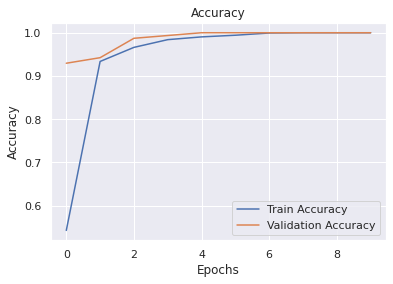

In [ ]:
plt.plot(history_6.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_6.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Loss

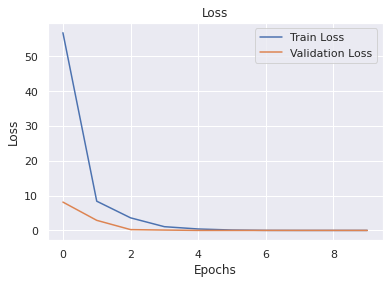

In [ ]:
plt.plot(history_6.history['loss'], label = 'Train Loss')
plt.plot(history_6.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Đánh giá model

In [ ]:
y_pred_total = []
y_true = []

for img, label in test_set_bai2:
  y_pred = model_6.predict(img)
  y_pred_total += np.argmax(y_pred, axis=-1).tolist()
  y_true += np.array(np.argmax(label, axis=-1)).flatten().tolist()

In [ ]:
accuracy = round(accuracy_score(y_true, y_pred_total)*100,2)
print('Accuracy test = {}%'.format(accuracy))

precision = round(precision_score(y_true, y_pred_total, average='micro')*100,2)
print('Precision micro test = {}%'.format(precision))
precision = round(precision_score(y_true, y_pred_total, average='macro')*100,2)
print('Precision macro test = {}%'.format(precision))

recall = round(recall_score(y_true, y_pred_total, average='micro')*100,2)
print('Recall micro test = {}%'.format(recall))
recall = round(recall_score(y_true, y_pred_total, average='macro')*100,2)
print('Recall macro test = {}%'.format(recall))

f1 = round(f1_score(y_true, y_pred_total, average='micro')*100,2)
print('F1-score micro test = {}%'.format(f1))
f1 = round(f1_score(y_true, y_pred_total, average='macro')*100,2)
print('F1-score macro test = {}%'.format(f1))

Accuracy test = 97.2%
Precision micro test = 97.2%
Precision macro test = 97.25%
Recall micro test = 97.2%
Recall macro test = 97.2%
F1-score micro test = 97.2%
F1-score macro test = 97.21%


#### Save model

In [ ]:
model_6.save('/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/NĂM 3 2021-2022/HỌC KỲ 1 2021 - 2022/DS201.M11 - DEEP LEARNING TRONG KHOA HỌC DỮ LIỆU/THỰC HÀNH/LAB/LAB05 24 11 2021/ResNet50_for_Jewellery.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
